In [133]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [134]:
#import data files
mouse_data_path = r'C:\Users\ashle\matplotlib-challenge\05-Matplotlib\Pymaceuticals\data\Mouse_metadata.csv'
study_results_path = r'C:\Users\ashle\matplotlib-challenge\05-Matplotlib\Pymaceuticals\data\Study_results.csv'

In [135]:
#import csv
mouse_data = pd.read_csv(mouse_data_path)
study_results = pd.read_csv(study_results_path)

In [136]:
#merge the 2 data sets
merged_data = pd.merge(mouse_data, study_results, on="Mouse ID")
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [137]:
#get the number of mice
unique_mice = merged_data["Mouse ID"].unique()
unique_mice_count = len(unique_mice)
unique_mice_count

249

In [138]:
#get the duplicate mice by ID number that shows up for Mouse ID and timepoint
cleaned_data = merged_data.drop_duplicates(["Mouse ID","Timepoint"])
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [139]:
#confirm number of mice in clean data
unique_mice_cleaned = cleaned_data["Mouse ID"].unique()
unique_mice_cleaned = len(unique_mice_cleaned)


In [140]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumordata_mean = cleaned_data["Tumor Volume (mm3)"].mean() 
tumordata_median = cleaned_data["Tumor Volume (mm3)"].median() 
variance_tumordata = np.var(cleaned_data["Tumor Volume (mm3)"], ddof= 0)
std_tumordata = np.std(cleaned_data["Tumor Volume (mm3)"], ddof= 0)


In [141]:
summary_statistics = pd.DataFrame({"Mean" : [tumordata_mean],"Median": [tumordata_median], "Variance": [variance_tumordata], "Standard Deviation": [std_tumordata]})
summary_statistics.head()

,Mean,Median,Variance,Standard Deviation
0,50.449276,48.951421,79.24928,8.902206


In [142]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
groupby_regimen = cleaned_data.groupby(["Drug Regimen"])


In [143]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
groupby_mean = groupby_regimen["Tumor Volume (mm3)"].mean() 
groupby_median = groupby_regimen["Tumor Volume (mm3)"].median() 
groupby_std = groupby_regimen["Tumor Volume (mm3)"].std()
groupby_var = groupby_regimen["Tumor Volume (mm3)"].var()
groupby_drug = groupby_regimen["Drug Regimen"].unique()
print(groupby_drug)
print(groupby_median)

Drug Regimen
Capomulin    [Capomulin]
Ceftamin      [Ceftamin]
Infubinol    [Infubinol]
Ketapril      [Ketapril]
Naftisol      [Naftisol]
Placebo        [Placebo]
Propriva      [Propriva]
Ramicane      [Ramicane]
Stelasyn      [Stelasyn]
Zoniferol    [Zoniferol]
Name: Drug Regimen, dtype: object
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64


In [144]:
# Assemble the resulting series into a single summary dataframe.
groupby_statistics = pd.DataFrame({"Mean" : [groupby_mean],"Median": [groupby_median], "Variance": [groupby_var], "Standard Deviation": [groupby_std]})
groupby_statistics.head()

,Mean,Median,Variance,Standard Deviation
0,Drug Regimen Capomulin 40.675741 Ceftamin ...,Drug Regimen Capomulin 41.557809 Ceftamin ...,Drug Regimen Capomulin 24.947764 Ceftamin ...,Drug Regimen Capomulin 4.994774 Ceftamin ...


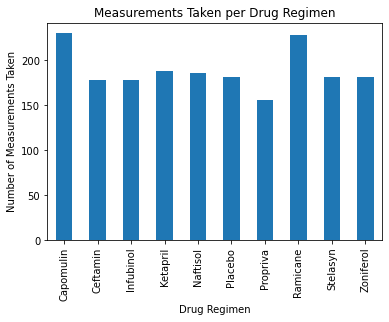

In [145]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas
drug_group = cleaned_data.groupby('Drug Regimen')
drug_count = drug_group['Tumor Volume (mm3)'].count()
drug_chart = drug_count.plot(kind="bar", title="Measurements Taken per Drug Regimen")
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Number of Measurements Taken")
plt.show()


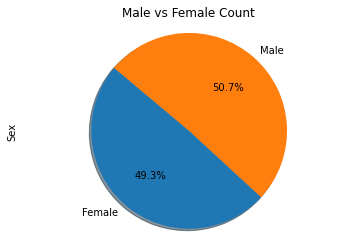

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#find sum of male and female mice
gender_group = cleaned_data.groupby('Sex')
gender_count = gender_group['Sex'].count()
gender_pie = gender_count.plot(kind="pie", shadow=True, startangle=140,autopct="%1.1f%%", title=("Male vs Female Count"))
plt.axis("equal")
plt.show()



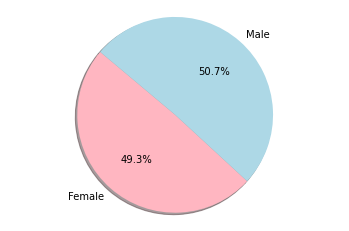

In [147]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors=["lightpink","lightblue"]
labels= ["Female","Male"]
plt.pie(gender_count,labels=labels,autopct="%1.1f%%",shadow=True,colors=colors, startangle=140)
plt.axis("equal")
plt.show()

In [178]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
tumor_final = cleaned_data.groupby('Mouse ID').max().reset_index()

#gather tumor volume for # Capomulin, Ramicane, Infubinol, and Ceftamin
bydrug_tumor_final = tumor_final.loc[tumor_final["Drug Regimen"].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
#merge data frame
merged_tumor_volume = bydrug_tumor_final[['Mouse ID','Timepoint']].merge(tumor_final, on=["Mouse ID", "Timepoint"],how='left')
merged_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,45.466677,1
4,a444,45,Ramicane,Female,10,25,45.000000,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,45.000000,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,45.000000,0


In [183]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ['Capomulin','Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_volume =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimens in drug_regimens:
    final_volume_bydrug = merged_tumor_volume.loc[merged_tumor_volume["Drug Regimen"]==regimens,'Tumor Volume (mm3)']
    #final_volume.append(final_volume_bydrug)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    print(final_volume_bydrug.quantile([.25,.5,.75]))
    
#print(final_volume)

0.25    45.000000
0.50    45.893720
0.75    46.749006
Name: Tumor Volume (mm3), dtype: float64
0.25    45.000000
0.50    45.521875
0.75    46.343832
Name: Tumor Volume (mm3), dtype: float64
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [ ]:
#Line and Scatter Plots
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [ ]:
#Corrlation and Regression
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen